### Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import nltk
from nltk import bigrams

from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

from bertopic import BERTopic
from bertopic.vectorizers import ClassTfidfTransformer
from hdbscan import HDBSCAN
from umap import UMAP


%matplotlib inline
nltk.download('stopwords')

/home/rodrigochavoni/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/rodrigochavoni/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Dataset

In [2]:
df = pd.read_csv('./data_process/tweets_prefeito_vacina_preprocessed2.csv')

In [3]:
df['text_Normalized'] = df['text_Normalized'].astype(str)
df['text_processed'] = df['text_processed'].astype(str)
list_text = df['text_Normalized'].tolist()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27382 entries, 0 to 27381
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                27382 non-null  int64  
 1   created_at                                27382 non-null  object 
 2   text                                      27382 non-null  object 
 3   public_metrics.like_count                 27382 non-null  int64  
 4   public_metrics.quote_count                27382 non-null  int64  
 5   public_metrics.reply_count                27382 non-null  int64  
 6   public_metrics.retweet_count              27382 non-null  int64  
 7   author.id                                 27382 non-null  int64  
 8   author.created_at                         27382 non-null  object 
 9   author.description                        27358 non-null  object 
 10  author.location                   

### Distribuição de Palavras

In [5]:
df['length'] = df.text.apply(lambda row: len(row.split()))
print('Tamanho médio dos tweets: ', df['length'].mean())

Tamanho médio dos tweets:  34.191622233584106


<Axes: title={'center': 'Distribuição de Palavras por Tweet'}, xlabel='Quantidade de Palavras', ylabel='Quantiade de Tweets'>

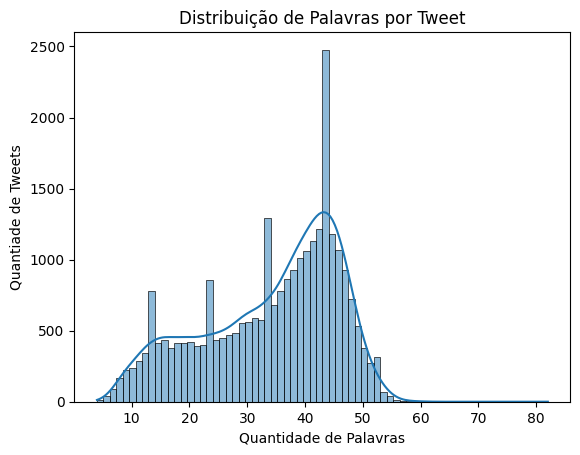

In [6]:
plt.xlabel('Quantidade de Palavras')
plt.ylabel('Quantiade de Tweets')
plt.title('Distribuição de Palavras por Tweet')
sns.histplot(df['length'], kde=True)

### BERTopic

In [ ]:
# Parâmertros do modelo

embedding_model = 'all-MiniLM-L6-v2'

vec_model = CountVectorizer()

clust_model = HDBSCAN(min_cluster_size=150, min_samples=2, prediction_data=True)

ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)

In [8]:
# Modelo

topic_model = BERTopic(language         = 'portuguese',
                       embedding_model  = embedding_model,
                       vectorizer_model = vec_model,
                       hdbscan_model    = clust_model,
                       ctfidf_model     = ctfidf_model, 
                       calculate_probabilities=True,
                       verbose          = True,
                       n_gram_range     = (1, 3)
                       )

topics, probs = topic_model.fit_transform(df['text_Normalized'])

2024-10-29 05:44:14,607 - BERTopic - Embedding - Transforming documents to embeddings.
Batches: 100%|██████████| 856/856 [02:56<00:00,  4.85it/s]
2024-10-29 05:47:14,350 - BERTopic - Embedding - Completed ✓
2024-10-29 05:47:14,353 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-10-29 05:47:45,821 - BERTopic - Dimensionality - Completed ✓
2024-10-29 05:47:45,822 - BERTopic - Cluster - Start clustering the reduced embeddings
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` 

### Load Model

In [19]:
topic_model = BERTopic.load("modelos_treinados/novo_modelo")

In [20]:
topics = topic_model.topics_
topic_info = topic_model.get_topic_info()
document_info = topic_model.get_document_info(list_text)

In [21]:
topic_info

,Topic,Count,Name,Representation,Representative_Docs
0,-1,1,-1_έχετε_και_χαρούμενο να_χαρούμενο,"[έχετε, και, χαρούμενο να, χαρούμενο, σας και ...",[hoje chegou vez tomar vacina contra covid é ú...
1,0,4789,0_vacinação_vacina_dose_doses,"[vacinação, vacina, dose, doses, não, pessoas,...",[vacinamos quase mil profissionais saúde estão...
2,1,3439,1_bolsonaro_não_governo_vacina,"[bolsonaro, não, governo, vacina, vacinas, gov...",[urgente governo bolsonaro pediu propina dólar...
3,2,1526,2_educação_escolas_professores_crianças,"[educação, escolas, professores, crianças, aul...",[prioridade é garantir direitos defesa vida es...
4,3,1318,3_mãe_amor_dia_pai,"[mãe, amor, dia, pai, feliz, não, filho, mães,...",[bia é sinônimo amor carinho gratidão orgulho ...
5,4,1405,4_brasil_vacina_vacinas_milhões,"[brasil, vacina, vacinas, milhões, doses, não,...",[milhões doses janssen irão braço brasileiros ...
6,5,858,5_mortes_morte_mortos_mil,"[mortes, morte, mortos, mil, não, brasil, covi...",[triste revoltante após sucessivos recordes ne...
7,6,871,6_coronavac_dose_doses_dose coronavac,"[coronavac, dose, doses, dose coronavac, vacin...",[coronavac retorno até oxford pfizer até pesso...
8,7,803,7_adolescentes_crianças_crianças adolescentes_...,"[adolescentes, crianças, crianças adolescentes...",[dia maio combate às formas abuso exploração v...
9,8,779,8_violência_mulheres_jacarezinho_não,"[violência, mulheres, jacarezinho, não, crime,...",[é lei assassinatos crianças adolescentes terã...


### Redução de Ruídos

In [22]:
new_topics = topic_model.reduce_outliers(list_text, topics , strategy="c-tf-idf", threshold=0.3)

new_topics = topic_model.reduce_outliers(list_text, new_topics, strategy="distributions")

#new_topics = topic_model.reduce_outliers(list_text, topics, probabilities=probs, strategy="probabilities")

100%|██████████| 1/1 [00:00<00:00, 25.21it/s]


In [23]:
topic_model.update_topics(list_text, topics=new_topics)

2024-11-11 18:47:43,376 - BERTopic - WARNING: Using a custom list of topic assignments may lead to errors if topic reduction techniques are used afterwards. Make sure that manually assigning topics is the last step in the pipeline.Note that topic embeddings will also be created through weightedc-TF-IDF embeddings instead of centroid embeddings.


In [24]:
topic_info = topic_model.get_topic_info()
document_info = topic_model.get_document_info(list_text)
topic_info

,Topic,Count,Name,Representation,Representative_Docs
0,-1,1,-1_έχετε_και_χαρούμενο να_χαρούμενο,"[έχετε, και, χαρούμενο να, χαρούμενο, σας και ...",[hoje chegou vez tomar vacina contra covid é ú...
1,0,4789,0_vacinação_vacina_dose_doses,"[vacinação, vacina, dose, doses, não, pessoas,...",[vacinamos quase mil profissionais saúde estão...
2,1,3439,1_bolsonaro_não_governo_vacina,"[bolsonaro, não, governo, vacina, vacinas, gov...",[urgente governo bolsonaro pediu propina dólar...
3,2,1526,2_educação_escolas_professores_crianças,"[educação, escolas, professores, crianças, aul...",[prioridade é garantir direitos defesa vida es...
4,3,1318,3_mãe_amor_dia_pai,"[mãe, amor, dia, pai, feliz, não, filho, mães,...",[bia é sinônimo amor carinho gratidão orgulho ...
5,4,1405,4_brasil_vacina_vacinas_milhões,"[brasil, vacina, vacinas, milhões, doses, não,...",[milhões doses janssen irão braço brasileiros ...
6,5,858,5_mortes_morte_mortos_mil,"[mortes, morte, mortos, mil, não, brasil, covi...",[triste revoltante após sucessivos recordes ne...
7,6,871,6_coronavac_dose_doses_dose coronavac,"[coronavac, dose, doses, dose coronavac, vacin...",[coronavac retorno até oxford pfizer até pesso...
8,7,803,7_adolescentes_crianças_crianças adolescentes_...,"[adolescentes, crianças, crianças adolescentes...",[dia maio combate às formas abuso exploração v...
9,8,779,8_violência_mulheres_jacarezinho_não,"[violência, mulheres, jacarezinho, não, crime,...",[é lei assassinatos crianças adolescentes terã...


### Merge de tópicos relacionados

In [25]:
topic_model.merge_topics(list_text, [[-1,3,7,8,10,11,14,16,18,20,25,27,30,31,32],[0,9,15,19,22,23,24,26,34],[1,13,33],[4,6,12,17,28,29],[5,21]])

In [26]:
topic_info2 = topic_model.get_topic_info()
document_info2 = topic_model.get_document_info(list_text)
topic_info2

,Topic,Count,Name,Representation,Representative_Docs
0,-1,7327,-1_não_crianças_hoje_dia,"[não, crianças, hoje, dia, mãe, são, anos, sob...",[dia nacional combate abuso exploração sexual ...
1,0,9086,0_vacinação_vacina_não_anos,"[vacinação, vacina, não, anos, dose, contra, p...",[bom dia pessoal hoje avançamos plano imunizaç...
2,1,4213,1_bolsonaro_não_vacina_governo,"[bolsonaro, não, vacina, governo, vacinas, pre...",[cada segundos vida perde conta descaso govern...
3,2,3954,2_vacina_brasil_não_coronavac,"[vacina, brasil, não, coronavac, doses, vacina...",[vacinasim hoje chegou amapá doses vacinas con...
4,3,1526,3_educação_crianças_escolas_professores,"[educação, crianças, escolas, professores, aul...",[vacinação trabalhadores educação ensino super...
5,4,1276,4_mortes_não_morte_mil,"[mortes, não, morte, mil, hospital, covid, são...",[estado são paulo registrou novas mortes provo...


### Renomeando Tópicos

In [27]:
topic_model.set_topic_labels({-1: 'Ruído', 0:'Informativos de Vacinação', 1:'Gestão do Governo na Pandemia', 2:'Avanço da Vacina', 3:'Voltas as Aulas Presenciais', 4:'Impacto do COVID-19'})

### Modelo Final

In [28]:
topic_model.save("modelos_treinados/modelo_final")

2024-11-11 18:47:57,765 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


### Extrair os documentos que representam os tópicos gerados.

In [29]:
def document_representation(document_info, true_text):
    document_representation = pd.DataFrame()
    for i in range(len(document_info.Topic.unique())):
        document_info_topic = document_info[document_info.Topic == i].sort_values(by='Probability', ascending=False)
        document_representation = pd.concat([document_representation, document_info_topic])
    document_representation = pd.merge(document_representation, true_text, left_index=True, right_index=True)
    document_representation.to_csv('document_representation_topic_modelo_final.csv')
    return document_representation
    
document_representation = document_representation(document_info, df['text'])

### Extrair os documentos assinalados como representativos daquele tópico, são três.

In [30]:
def document_representation_true(document_info, true_text):
    document_representation_true = pd.DataFrame()
    for i in range(len(document_info.Topic.unique())):
        document_representation = document_info[document_info.Representative_document == True]
        document_info_topic = document_representation[document_representation.Topic == i]
        document_representation_true = pd.concat([document_representation_true, document_info_topic])
    document_representation_true = pd.merge(document_representation_true, true_text, left_index=True, right_index=True)
    document_representation_true.to_csv('document_representation_true_topic2.csv')
    return document_representation_true
    
document_representation_true = document_representation_true(document_info, df['text'])